# Усынин Ю.А. ИУ5-65Б

# Рубежный контроль №1
**Тема:** Технологии разведочного анализа и обработки данных.

**Вариант:** 20

**Задача №3.**
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

**Дополнение для ИУ5-65Б.**
Для студентов группы ИУ5-65Б - для набора данных построить "парные диаграммы"

**Импортируем библиотеки**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.impute
import sklearn.preprocessing
%matplotlib inline 
sns.set(style="ticks")

**Загружаем Датасет**

In [2]:
data=pd.read_csv("sample_data/states_all.csv")

In [3]:
# Первые 5 строк датасета
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
# типы колонок
data.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [5]:
# размер набора данных
data.shape

(1715, 25)

# **Переходим  к масштабированию данных.**

Масштабирование предполагает изменение диапазона измерения величины.



In [6]:
# Импортируем библиотеки
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [7]:
# Основные статистические характеристки набора данных
data.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,1.275000e+03,1542.000000,1632.000000,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,9.034675e+05,17840.958495,68810.962010,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,1.329473e+06,30016.603510,80671.033008,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,1.815070e+05,2199.750000,19029.750000,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,5.104280e+05,8258.000000,48122.000000,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,9.661480e+05,22691.750000,78864.250000,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


Выберем для масштабирования параметр **"STATE_REVENUE"**

In [8]:
data['STATE_REVENUE']

0        1659028.0
1         720711.0
2        1369815.0
3         958785.0
4       16546514.0
           ...    
1710           NaN
1711           NaN
1712           NaN
1713           NaN
1714           NaN
Name: STATE_REVENUE, Length: 1715, dtype: float64

# Как правило, применяют два следующих подхода: 
**Первый** - **MinMax** масштабирование

In [9]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['STATE_REVENUE']])

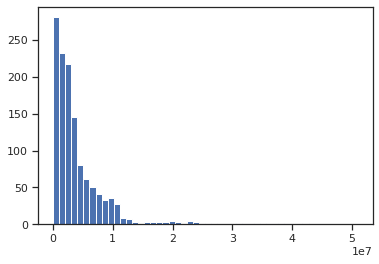

In [10]:
plt.hist(data['STATE_REVENUE'], 50)
plt.show()

**В этом случае значения лежат в диапазоне от 0 до 1.**

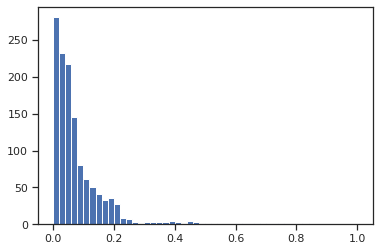

In [11]:
plt.hist(sc1_data, 50)
plt.show()

**Второй** - масштабирование данных на основе Z-оценки **(StandardScaler)**

In [12]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['STATE_REVENUE']])

**В этом случае большинство значений попадает в диапазон от -3 до 3.**

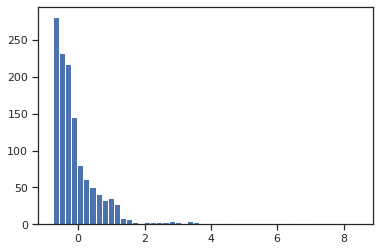

In [13]:
plt.hist(sc2_data, 50)
plt.show()

# Преобразование категориальных признаков в количественные

# Первый способ - **label encoding**

**Выберем параметр "STATE"**

In [14]:
types=data["STATE"]
types.value_counts()

OREGON                  33
SOUTH_DAKOTA            33
NEBRASKA                33
CONNECTICUT             33
UTAH                    33
WASHINGTON              33
IOWA                    33
TEXAS                   33
OKLAHOMA                33
MISSISSIPPI             33
WEST_VIRGINIA           33
MONTANA                 33
WISCONSIN               33
MICHIGAN                33
DELAWARE                33
KENTUCKY                33
HAWAII                  33
DISTRICT_OF_COLUMBIA    33
FLORIDA                 33
ALABAMA                 33
COLORADO                33
NEVADA                  33
MISSOURI                33
NORTH_DAKOTA            33
ALASKA                  33
MASSACHUSETTS           33
NEW_MEXICO              33
CALIFORNIA              33
ILLINOIS                33
MAINE                   33
PENNSYLVANIA            33
INDIANA                 33
NEW_YORK                33
SOUTH_CAROLINA          33
RHODE_ISLAND            33
NEW_HAMPSHIRE           33
NEW_JERSEY              33
K

**Кодирование категорий целочисленными значениями - label encoding**

In [15]:
le=sklearn.preprocessing.LabelEncoder()
type_le=le.fit_transform(types)
print(np.unique(type_le))
le.inverse_transform(np.unique(type_le))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]


array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'DODEA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS',
       'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE',
       'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NATIONAL', 'NEBRASKA',
       'NEVADA', 'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK',
       'NORTH_CAROLINA', 'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

# Второй способ - **one hot encoding**

Будем использовать **Pandas get_dummies** - быстрый вариант **one-hot** кодирования

In [16]:
type_s=pd.get_dummies(types)
type_s.head(25)

,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT_OF_COLUMBIA,DODEA,FLORIDA,GEORGIA,HAWAII,IDAHO,ILLINOIS,INDIANA,IOWA,KANSAS,KENTUCKY,LOUISIANA,MAINE,MARYLAND,MASSACHUSETTS,MICHIGAN,MINNESOTA,MISSISSIPPI,MISSOURI,MONTANA,NATIONAL,NEBRASKA,NEVADA,NEW_HAMPSHIRE,NEW_JERSEY,NEW_MEXICO,NEW_YORK,NORTH_CAROLINA,NORTH_DAKOTA,OHIO,OKLAHOMA,OREGON,PENNSYLVANIA,RHODE_ISLAND,SOUTH_CAROLINA,SOUTH_DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST_VIRGINIA,WISCONSIN,WYOMING
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# "Парные диаграммы"

Комбинация гистограмм и диаграмм рассеивания для всего набора данных. Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

In [17]:
sns.pairplot(data)

Output hidden; open in https://colab.research.google.com to view.